In [1]:
from torch import nn, optim
import torch.nn.functional as F

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        # flatten input tensor
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)

        return x

model = Classifier()
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [4]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [5]:
from torchvision import datasets, transforms
import torch

# Define Transform
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = datasets.FashionMNIST('FashionMNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

0it [00:00, ?it/s]

100%|█████████▉| 26386432/26421880 [00:30<00:00, 2004613.11it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw


Extracting FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw


Extracting FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw


Extracting FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw
Processing...
Done!


/Users/slava/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
26427392it [00:50, 2004613.11it/s]                              


In [11]:
#Training

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        logps = model(images)
        loss = criterion(logps, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss
    else:
        print(f"Training loss: {running_loss}")

Training loss: 283.349365234375
Training loss: 275.8318786621094
Training loss: 266.0540466308594
Training loss: 258.8417663574219
Training loss: 252.80032348632812
Training loss: 244.98580932617188
Training loss: 238.80374145507812
Training loss: 237.12838745117188
Training loss: 225.71908569335938
Training loss: 225.2315673828125


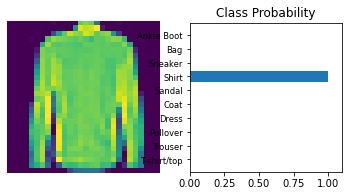

In [16]:
import matplotlib.pyplot as plt
import numpy as np


images, labels = next(iter(trainloader))

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

img = images[1]
ps = torch.exp(model(img))
view_classify(img.view(1, 28, 28), ps, version="Fashion")